In [197]:
#Objective 1:
#Build a Bubble Plot that showcases relationships between four key variables:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type

#Objective 2:
#Produce three pie charts that visualize how variables break down by City Type:
#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type

In [198]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [199]:
#Read in the data into a DataFrames
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

#print info
print(f"{city_df.head(2)} \n")
print(f"{ride_df.head(2)}\n")
print(f"city_df data types:\n{city_df.dtypes} \n")
print(f"ride_df data types:\n{ride_df.dtypes} \n")

#city = City Name, driver_count = number of drivers in that city, type = city type
#date = start?/end? date of fare, fare = dollar amount charged for the ride, ride_id = ride UUID

#check for invalid data
print('city_df-------------------------------------\n')
print(f"city_df.city count: {city_df['city'].count()}\n")
print(f"city_df.city nunique: {city_df['city'].nunique()}\n")
print(f"city_df.city isna: {city_df['city'].isna().sum()}\n\n")
      
print(f"city_df.driver_count count: {city_df['driver_count'].count()}\n")
print(f"city_df.driver_count nunique: {city_df['driver_count'].nunique()}\n")
print(f"city_df.driver_count isna: {city_df['driver_count'].isna().sum()}\n\n")
      
print(f"city_df.type count: {city_df['type'].count()}\n")
print(f"city_df.type nunique: {city_df['type'].nunique()}\n")
print(f"city_df.type isna: {city_df['type'].isna().sum()}\n\n")
      
#Check ride_df for invalid data
print('ride_df--------------------------------------\n')
print(f"ride_df.city count: {ride_df['city'].count()}\n")
print(f"ride_df.city nunique: {ride_df['city'].nunique()}\n")
print(f"ride_df.city isna: {ride_df['city'].isna().sum()}\n\n")

print(f"ride_df.date count: {ride_df['date'].count()}\n")
print(f"ride_df.date nunique: {ride_df['date'].nunique()}\n")
print(f"ride_df.date isna: {ride_df['date'].isna().sum()}\n\n")

print(f"ride_df.fare count: {ride_df['fare'].count()}\n")
print(f"ride_df.fare nunique: {ride_df['fare'].nunique()}\n")
print(f"ride_df.fare isna: {ride_df['fare'].isna().sum()}\n\n")
      
print(f"ride_df.ride_id count: {ride_df['ride_id'].count()}\n")
print(f"ride_df.ride_id nunique: {ride_df['ride_id'].nunique()}\n")
print(f"ride_df.ride_id isna: {ride_df['ride_id'].isna().sum()}\n\n")
            

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban 

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577

city_df data types:
city            object
driver_count     int64
type            object
dtype: object 

ride_df data types:
city        object
date        object
fare       float64
ride_id      int64
dtype: object 

city_df-------------------------------------

city_df.city count: 120

city_df.city nunique: 120

city_df.city isna: 0


city_df.driver_count count: 120

city_df.driver_count nunique: 52

city_df.driver_count isna: 0


city_df.type count: 120

city_df.type nunique: 3

city_df.type isna: 0


ride_df--------------------------------------

ride_df.city count: 2375

ride_df.city nunique: 120

ride_df.city isna: 0


ride_df.date count: 2375

ride_df.date nunique: 2375

ride_

In [200]:
#Merge the data conversing ride information
data = ride_df.merge(city_df, how="left", on="city")
print(f"{data.head()}\n")
print(f"{data.count()}")

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64


<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Pyber Income from Ride Fares Comes Mostly from Urban Cities')

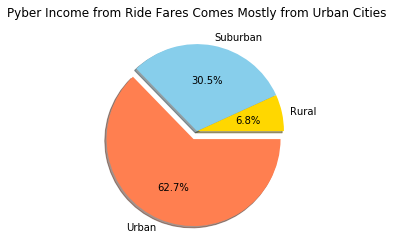

In [201]:
#Create a pie chart breaking down Fares by city type
type_group = data.groupby("type")

#Pyber colors are gold, skyblue, and coral
colors = ["gold", "skyblue", "coral"]

#Define pie slices
x_series = type_group["fare"].sum()
print(type(x_series))

#Define explode to pop ou the largest slice
explode = [0.1 * int((x_series.idxmax() == x_series.index[x])) for x in range(len(x_series))]

plt.pie(x_series, explode=explode, labels=type_group["fare"].sum().index, autopct='%.1f%%', shadow=True, colors=colors)
plt.title("Pyber Income from Ride Fares Comes Mostly from Urban Cities")

Text(0.5, 1.0, 'Pyber Rides are Mostly Completed in Urban Cities')

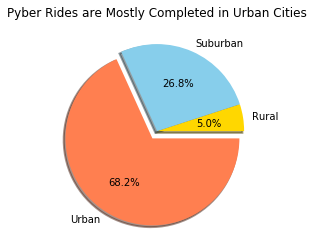

In [202]:
#Create a pie chart breaking down Rides by city type

#Define pie slices
x_series = type_group["ride_id"].sum()
#print(x_series)
#print(x_series.idxmax())
#print(x_series.index[2])

#Define explode to pop ou the largest slice
explode = [0.1 * int((x_series.idxmax() == x_series.index[x])) for x in range(len(x_series))]

#Create pie chart
plt.pie(x_series, explode = explode, labels=type_group["ride_id"].sum().index, autopct='%.1f%%', shadow=True, colors=colors, wedgeprops={"linewidth":2})
plt.title("Pyber Rides are Mostly Completed in Urban Cities")

Text(0.5, 1.0, 'Almost All Pyber Drivers are from Urban Cities')

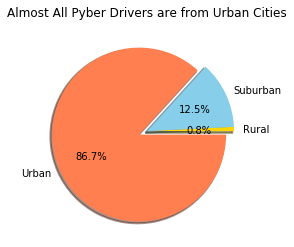

In [203]:
#Create a pie chart breaking down Driver Count by city type

#Define pie slices
x_series = type_group["driver_count"].sum()

#Define explode to pop ou the largest slice
explode = [0.1 * int((x_series.idxmax() == x_series.index[x])) for x in range(len(x_series))]

#Create pie chart
plt.pie(x_series, explode = explode, labels=type_group["ride_id"].sum().index, autopct='%.1f%%', shadow=True, colors=colors,wedgeprops={"linewidth":2})
plt.title("Almost All Pyber Drivers are from Urban Cities")

In [204]:
#Analyze data from the point of view of each city
city_group = data.groupby("city")

#Define the total income from fares by city
city_fares = city_group["fare"].sum()

#Define the average fare by city
city_avg_fare = city_group["fare"].sum() / city_group["ride_id"].count()

#Define Total Number of Rides per City
city_rides = city_group["ride_id"].count()

#Define Total Number of Drivers per City
city_drivers = city_group["driver_count"].sum()

#Define the type of city
city_type = city_group["type"].first()

In [205]:
#Create a dataframe for plotting
data = {
    "Total of Fares" : city_fares,
    "Average Fare" : city_avg_fare,
    "Total Rides": city_rides,
    "Total Drivers" : city_drivers,
    "City Type" : city_type
}

city_group_df = pd.DataFrame(data=data)
city_group_df

,Total of Fares,Average Fare,Total Rides,Total Drivers,City Type
city,,,,,
Amandaburgh,443.55,24.641667,18,216,Urban
Barajasview,557.31,25.332273,22,572,Urban
Barronchester,582.76,36.422500,16,176,Suburban
Bethanyland,593.21,32.956111,18,396,Suburban
Bradshawfurt,400.64,40.064000,10,70,Rural
Brandonfort,673.31,35.437368,19,190,Suburban
Carriemouth,764.49,28.314444,27,1404,Urban
Christopherfurt,661.55,24.501852,27,1107,Urban
Colemanland,679.68,30.894545,22,506,Suburban


Text(42, 35, 'Note: Marker size represents the number of drivers in the city.')

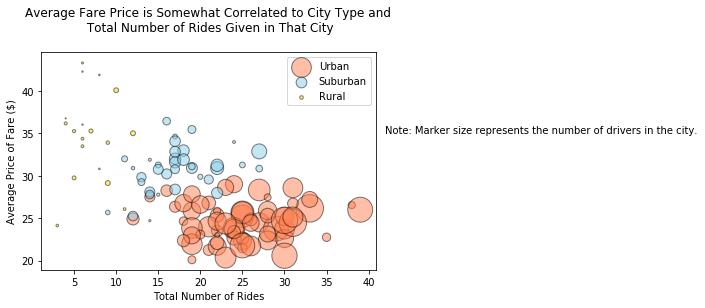

In [206]:
##### Create Bubble plots for each city type with a shared x axis
fig, ax = plt.subplots()

#plot Urban Data with marker size indicating the number of drivers in a city
#series1 = ax.scatter(city_group_df["Total Rides"], city_group_df["Average Fare"], s=city_group_df["Total Drivers"]/3, edgecolors="black", alpha=0.33)
series1 = ax.scatter(
    city_group_df.loc[city_group_df["City Type"] == "Urban", "Total Rides"], 
    city_group_df.loc[city_group_df["City Type"] == "Urban", "Average Fare"], 
    s=city_group_df.loc[city_group_df["City Type"] == "Urban", "Total Drivers"]/3, 
    edgecolors="black", 
    alpha=0.5,
    c="coral")

#plot Suburban Data with marker size indicating the number of drivers in a city
series2 = ax.scatter(
    city_group_df.loc[city_group_df["City Type"] == "Suburban", "Total Rides"], 
    city_group_df.loc[city_group_df["City Type"] == "Suburban", "Average Fare"], 
    s=city_group_df.loc[city_group_df["City Type"] == "Suburban", "Total Drivers"]/3, 
    edgecolors="black", 
    alpha=0.5,
    c="skyblue")

#plot Rural Data with marker size indicating the number of drivers in a city
series3 = ax.scatter(
    city_group_df.loc[city_group_df["City Type"] == "Rural", "Total Rides"], 
    city_group_df.loc[city_group_df["City Type"] == "Rural", "Average Fare"], 
    s=city_group_df.loc[city_group_df["City Type"] == "Rural", "Total Drivers"]/3, 
    edgecolors="black", 
    alpha=0.5,
    c="gold")


#Format Bubble Plot
ax.set_xlabel("Total Number of Rides")
ax.set_ylabel("Average Price of Fare ($)")
ax.set_title("Average Fare Price is Somewhat Correlated to City Type and\n Total Number of Rides Given in That City\n")
ax.legend(["Urban", "Suburban", "Rural"])
ax.text(42,35,"Note: Marker size represents the number of drivers in the city.")
#Show Bubble Plot